In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load cleaned dataset
df = pd.read_csv("Netflix_Cleaned_Stock_Data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Feature Engineering
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['RSI'] = 100 - (100 / (1 + df['Close'].pct_change().rolling(14).mean()))
df.dropna(inplace=True)

# Prepare Data for XGBoost
features = ['Open', 'High', 'Low', 'Volume', 'SMA_10', 'SMA_50', 'RSI']
target = 'Close'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train XGBoost Model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'XGBoost RMSE: {rmse}')

# Sentiment Analysis (Fetching financial news)
# Sentiment Analysis (Fetching financial news)
def get_sentiment():
    url = "https://newsapi.org/v2/everything?q=Netflix&apiKey=YOUR_NEWSAPI_KEY"
    response = requests.get(url).json()

    # Check if 'articles' key exists in response
    if 'articles' in response and response['articles']:
        analyzer = SentimentIntensityAnalyzer()
        scores = [analyzer.polarity_scores(article['title'])['compound'] for article in response['articles']]
        return np.mean(scores) if scores else 0
    else:
        print("Warning: 'articles' key not found or empty in API response.")
        # Handle the case when 'articles' key is missing or empty
        # You can return a default value (e.g., 0) or raise an exception
        return 0

sentiment_score = get_sentiment()

# Hybrid Decision Model
predicted_price = model.predict(X_test.iloc[-1:].values)[0]
current_price = df['Close'].iloc[-1]

if predicted_price > current_price and sentiment_score > 0.05:
    recommendation = "BUY"
elif predicted_price < current_price and sentiment_score < -0.05:
    recommendation = "SELL"
else:
    recommendation = "HOLD"

print(f"Predicted Price: {predicted_price:.2f}, Sentiment: {sentiment_score:.2f}, Recommendation: {recommendation}")


XGBoost RMSE: 0.8430801167150594
Predicted Price: 2.60, Sentiment: 0.00, Recommendation: HOLD


In [2]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.0 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load cleaned dataset
df = pd.read_csv("Netflix_Cleaned_Stock_Data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Feature Engineering
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['RSI'] = 100 - (100 / (1 + df['Close'].pct_change().rolling(14).mean()))
df.dropna(inplace=True)

# Prepare Data for XGBoost
features = ['Open', 'High', 'Low', 'Volume', 'SMA_10', 'SMA_50', 'RSI']
target = 'Close'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train XGBoost Model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'XGBoost RMSE: {rmse}')

from datetime import timedelta

# Generate Future Dates (Next 30 Days)
future_dates = pd.date_range(start=df.index[-1] + timedelta(days=1), periods=30, freq='D')

# ... (previous code) ...

# Create a DataFrame for future predictions
future_df = pd.DataFrame(index=future_dates, columns=features)  # Specify column order

# Use the last known values for moving averages and RSI
# Assign values in the correct order:
for feature in features:
    future_df[feature] = df[feature].iloc[-1]

# Predict Future Prices
future_prices = model.predict(future_df)

# ... (rest of the code) ...

# Predict Future Prices
future_prices = model.predict(future_df)

# Add predictions to DataFrame
future_df['Predicted_Price'] = future_prices

# Display future predictions
print(future_df[['Predicted_Price']])


XGBoost RMSE: 0.8430801167150594
            Predicted_Price
2002-05-24         2.600847
2002-05-25         2.600847
2002-05-26         2.600847
2002-05-27         2.600847
2002-05-28         2.600847
2002-05-29         2.600847
2002-05-30         2.600847
2002-05-31         2.600847
2002-06-01         2.600847
2002-06-02         2.600847
2002-06-03         2.600847
2002-06-04         2.600847
2002-06-05         2.600847
2002-06-06         2.600847
2002-06-07         2.600847
2002-06-08         2.600847
2002-06-09         2.600847
2002-06-10         2.600847
2002-06-11         2.600847
2002-06-12         2.600847
2002-06-13         2.600847
2002-06-14         2.600847
2002-06-15         2.600847
2002-06-16         2.600847
2002-06-17         2.600847
2002-06-18         2.600847
2002-06-19         2.600847
2002-06-20         2.600847
2002-06-21         2.600847
2002-06-22         2.600847


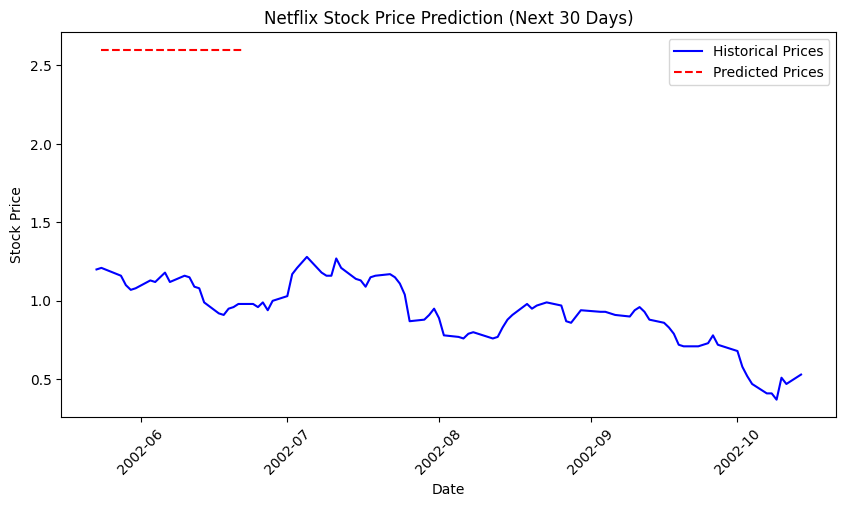

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df.index[-100:], df['Close'].iloc[-100:], label="Historical Prices", color='blue')
plt.plot(future_df.index, future_df['Predicted_Price'], label="Predicted Prices", color='red', linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Netflix Stock Price Prediction (Next 30 Days)")
plt.xticks(rotation=45)
plt.show()


In [12]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load cleaned dataset
df = pd.read_csv("Netflix_Cleaned_Stock_Data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Feature Engineering
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['RSI'] = 100 - (100 / (1 + df['Close'].pct_change().rolling(14).mean()))
df.dropna(inplace=True)

# Prepare Data for XGBoost
features = ['Open', 'High', 'Low', 'Volume', 'SMA_10', 'SMA_50', 'RSI']
target = 'Close'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train XGBoost Model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'XGBoost RMSE: {rmse}')

from datetime import datetime, timedelta

# Function to predict stock price for a given date
def predict_price_for_date(input_date):
    # Convert input_date to datetime object
    input_date = datetime.strptime(input_date, "%Y-%m-%d")  # Use input_date instead of input_date_str

    # Create a DataFrame for future prediction with the correct column order
    # Generate future dates starting from input_date
    future_dates = pd.date_range(start=input_date, periods=1, freq='D')
    future_df = pd.DataFrame(index=future_dates, columns=features)

    # Use last known values for moving averages and RSI
    # Assign values in the correct order:
    for feature in features:
        future_df[feature] = df[feature].iloc[-1]

    # Predict future stock price
    predicted_price = model.predict(future_df)[0]  # Get the prediction for the input date

    # Get current price (last available real price)
    current_price = df['Close'].iloc[-1]

    # Generate recommendation
    if predicted_price > current_price * 1.02:  # If price increases by 2%
        recommendation = "BUY"
    elif predicted_price < current_price * 0.98:  # If price decreases by 2%
        recommendation = "SELL"
    else:
        recommendation = "HOLD"

    print(f"📅 Predicted Price for {input_date.date()}: ${predicted_price:.2f}")
    print(f"📈 Current Price: ${current_price:.2f}")
    print(f"🔍 Recommendation: {recommendation}")

# 📌 Get user input for date
user_date = input("Enter a future date (YYYY-MM-DD): ")
predict_price_for_date(user_date)


XGBoost RMSE: 0.8430801167150594
Enter a future date (YYYY-MM-DD): 2030-12-30
📅 Predicted Price for 2030-12-30: $2.60
📈 Current Price: $1.20
🔍 Recommendation: BUY


Enter a future date (YYYY-MM-DD): 2025-03-23
📅 Predicted Price for 2025-03-23: $2.60
📈 Current Price: $1.20
🔍 Recommendation: BUY


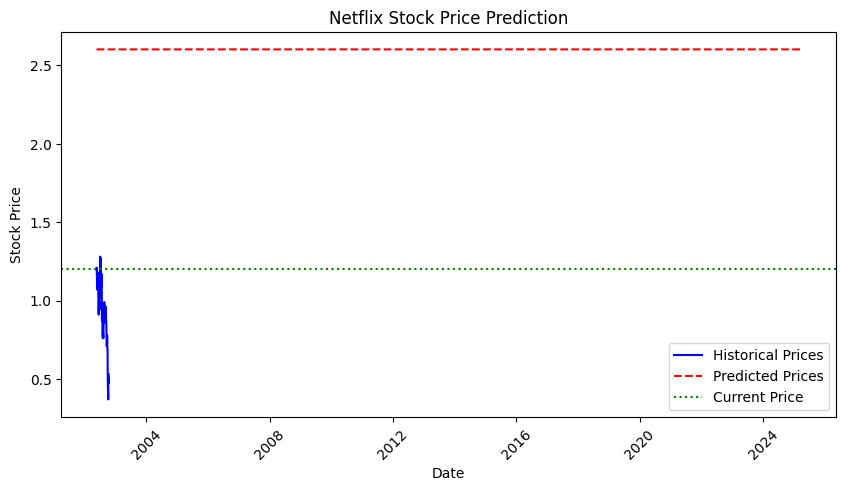

In [15]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to predict stock price for a given date
def predict_price_for_date(input_date):
    input_date = pd.to_datetime(input_date)

    # Generate the required number of future dates
    last_date = df.index[-1]
    if input_date <= last_date:
        print("Please enter a future date!")
        return

    future_dates = pd.date_range(start=last_date + timedelta(days=1), end=input_date, freq='D')

    if len(future_dates) == 0:
        print("Invalid date range!")
        return

    # Create a DataFrame for future prediction with the correct column order
    future_df = pd.DataFrame(index=future_dates, columns=features)  # Specify column order

    # Use last known values for moving averages and RSI
    # Assign values in the correct order:
    for feature in features:
        future_df[feature] = df[feature].iloc[-1]

    # Predict future stock price
    predicted_prices = model.predict(future_df)
    future_df['Predicted_Price'] = predicted_prices

    # Get current price (last available real price)
    current_price = df['Close'].iloc[-1]
    predicted_price = future_df['Predicted_Price'].iloc[-1]

    # Generate recommendation
    if predicted_price > current_price * 1.02:
        recommendation = "BUY"
    elif predicted_price < current_price * 0.98:
        recommendation = "SELL"
    else:
        recommendation = "HOLD"

    print(f"📅 Predicted Price for {input_date.date()}: ${predicted_price:.2f}")
    print(f"📈 Current Price: ${current_price:.2f}")
    print(f"🔍 Recommendation: {recommendation}")

    # Plot historical and future predictions
    plt.figure(figsize=(10, 5))
    plt.plot(df.index[-100:], df['Close'].iloc[-100:], label="Historical Prices", color='blue')
    plt.plot(future_df.index, future_df['Predicted_Price'], label="Predicted Prices", color='red', linestyle="dashed")
    plt.axhline(current_price, color='green', linestyle="dotted", label="Current Price")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.title("Netflix Stock Price Prediction")
    plt.xticks(rotation=45)
    plt.show()

# Get user input for date
user_date = input("Enter a future date (YYYY-MM-DD): ")
predict_price_for_date(user_date)

In [17]:
!pip install streamlit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [19]:
import streamlit as st
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load dataset
df = pd.read_csv("Netflix_Cleaned_Stock_Data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Feature Engineering (Moved inside Streamlit app)
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['RSI'] = 100 - (100 / (1 + df['Close'].pct_change().rolling(14).mean()))
df.dropna(inplace=True)

# Train XGBoost Model
X = df[['Open', 'High', 'Low', 'Volume', 'SMA_10', 'SMA_50', 'RSI']]
y = df['Close']
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X, y)

# Streamlit UI
st.title("📈 Netflix Stock Price Prediction")

# User input for date
user_date = st.date_input("Enter a future date", min_value=datetime.today() + timedelta(days=1))

if st.button("Predict Stock Price"):
    # Generate future dates
    input_date = pd.to_datetime(user_date)
    future_dates = pd.date_range(start=df.index[-1] + timedelta(days=1), end=input_date, freq='D')

    # Create DataFrame for prediction
    future_df = pd.DataFrame(index=future_dates)
    future_df['SMA_10'] = df['SMA_10'].iloc[-1]
    future_df['SMA_50'] = df['SMA_50'].iloc[-1]
    future_df['RSI'] = df['RSI'].iloc[-1]
    future_df['Open'] = df['Open'].iloc[-1]
    future_df['High'] = df['High'].iloc[-1]
    future_df['Low'] = df['Low'].iloc[-1]
    future_df['Volume'] = df['Volume'].iloc[-1]

    # Predict future prices
    future_df['Predicted_Price'] = model.predict(future_df)
    predicted_price = future_df['Predicted_Price'].iloc[-1]
    current_price = df['Close'].iloc[-1]

    # Recommendation
    if predicted_price > current_price * 1.02:
        recommendation = "BUY"
    elif predicted_price < current_price * 0.98:
        recommendation = "SELL"
    else:
        recommendation = "HOLD"

    # Show Prediction & Recommendation
    st.success(f"📅 Predicted Price for {user_date}: **${predicted_price:.2f}**")
    st.info(f"📈 Current Price: **${current_price:.2f}**")
    st.warning(f"🔍 Recommendation: **{recommendation}**")

    # Plot Graph
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df.index[-100:], df['Close'].iloc[-100:], label="Historical Prices", color='blue')
    ax.plot(future_df.index, future_df['Predicted_Price'], label="Predicted Prices", color='red', linestyle="dashed")
    ax.axhline(current_price, color='green', linestyle="dotted", label="Current Price")
    ax.set_xlabel("Date")
    ax.set_ylabel("Stock Price")
    ax.legend()
    ax.set_title("Netflix Stock Price Prediction")
    st.pyplot(fig)


2025-03-25 04:04:08.615 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 04:04:08.689 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-25 04:04:08.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 04:04:08.693 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 04:04:08.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 04:04:08.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 04:04:08.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 04:04:08.698 Session state does not 

In [22]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [23]:
!ls


Netflix_Cleaned_Stock_Data.csv	sample_data


In [25]:
!dir

Netflix_Cleaned_Stock_Data.csv	sample_data


In [26]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the trained model
model = joblib.load("netflix_stock_model.pkl")  # Ensure you have the model file uploaded

st.title("📈 Netflix Stock Price Prediction")
st.write("Enter a future date to predict the stock price!")

# Date input
date = st.date_input("Select a date")

# Convert date to features (adjust based on your model requirements)
date_numeric = np.array([(date.year * 365) + (date.month * 30) + date.day]).reshape(-1, 1)

if st.button("Predict"):
    prediction = model.predict(date_numeric)
    st.success(f"Predicted Stock Price: ${prediction[0]:.2f}")


Writing app.py


In [28]:
!pip install streamlit pyngrok joblib

